In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchmetrics

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch_device import DEVICE

import math
import numpy
from tqdm.auto import tqdm

from sklearn.datasets import make_circles, make_moons, make_blobs, load_iris
from sklearn.model_selection import train_test_split

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

DEVICE

cuda


c:\Users\91748\.conda\envs\ml_stuff\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [3]:
RAND_SEED = 25
torch.manual_seed(RAND_SEED)

In [4]:
torch.__version__, torchvision.__version__

('2.5.1+cu118', '0.20.1+cu118')

In [5]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [9]:
classes = train_data.classes

Text(0.5, 1.0, 'T-shirt/top')

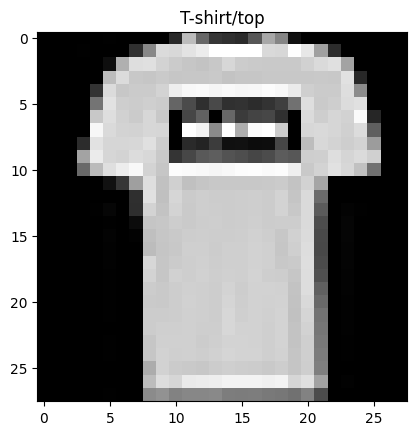

In [10]:
image, label = train_data[1]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])

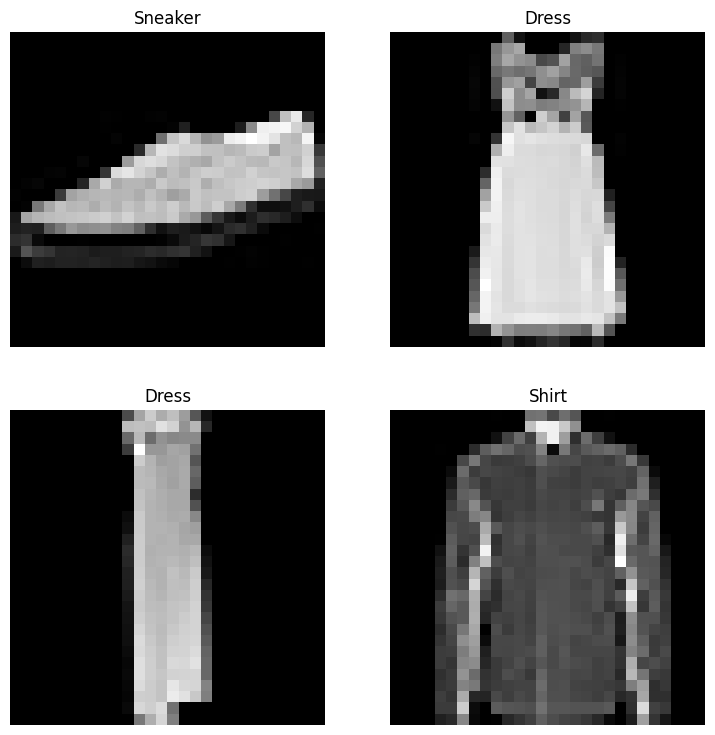

In [11]:
fig = plt.figure(figsize=(9,9))
rows = cols = 2
random_idx = torch.randint(0, len(train_data), size=[rows*cols+1])
for i in range(1, rows*cols+1):
    img, lab = train_data[random_idx[i]]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[lab])
    plt.axis(False)

In [12]:
BATCH_SIZE = 64

train_data_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True
)

test_data_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    drop_last=True
)


len(train_data_loader), len(test_data_loader)

(937, 156)

In [13]:
batch, batch_label = next(iter(train_data_loader))
batch, batch_label, batch.shape

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.2353, 0.0000, 0.0118],
           [0.0000

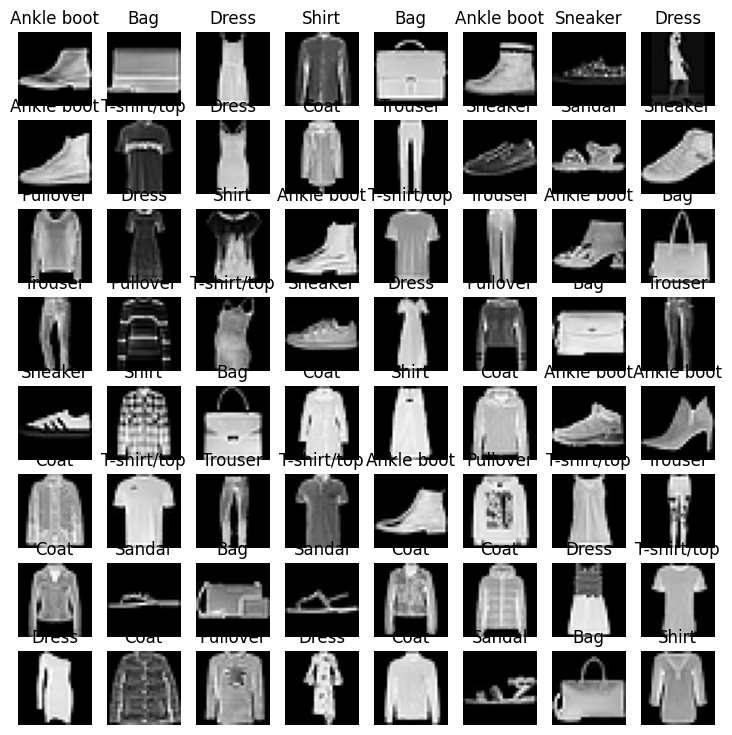

In [14]:
fig = plt.figure(figsize=(9,9))
batch, batch_label = next(iter(train_data_loader))
rows = cols = int(math.sqrt(BATCH_SIZE))
for i in range(1, BATCH_SIZE+1):
    img, lab = batch[i-1], batch_label[i-1]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[lab])
    plt.axis(False)

In [15]:
flatten_layer = nn.Flatten()

x = batch[0]

x_flat = flatten_layer.forward(x)

x.shape, x_flat.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [16]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [17]:
x_flat

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [18]:
class NonCNN(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape, ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)
    
model = NonCNN(input_shape=784, hidden_units=10, output_shape=len(classes)).to("cpu")
model

NonCNN(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
# torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [20]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
train_time_cpu = timer()

epochs = 5  

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch} ....")

    train_loss = 0

    for (batch, (X_train,y_train)) in enumerate(train_data_loader):
        model.train()
        y_train_pred =  model.forward(X_train)

        loss = loss_fn(y_train_pred, y_train)

        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 100 == 0:
            print(f"Looked at {batch * len(X_train)}/{len(train_data_loader.dataset)} samples")

    train_loss /= len(train_data_loader)

    test_loss, test_accuracy = 0, 0

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            test_pred = model.forward(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_accuracy += torchmetrics.Accuracy(task = 'multiclass', num_classes=len(classes)).to('cpu')
        test_loss /= len(test_data_loader)
        test_accuracy /= len(test_data_loader)
        print(f"Avg Test Accuracy per batch: {test_accuracy}")
        print(f"Avg Test Accuracy per batch: {test_loss}")

train_time_cpu_end = timer()

total_train_time_cpu = print_train_time(train_time_cpu, train_time_cpu_end, device=str(next(model.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 ....
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples


 20%|██        | 1/5 [00:08<00:32,  8.15s/it]

Avg Test Accuracy per batch: CompositionalMetric(
  true_divide(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    Com

 40%|████      | 2/5 [00:16<00:24,  8.17s/it]

Avg Test Accuracy per batch: CompositionalMetric(
  true_divide(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    Com

 60%|██████    | 3/5 [00:24<00:16,  8.27s/it]

Avg Test Accuracy per batch: CompositionalMetric(
  true_divide(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    Com

 80%|████████  | 4/5 [00:32<00:08,  8.24s/it]

Avg Test Accuracy per batch: CompositionalMetric(
  true_divide(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    Com

100%|██████████| 5/5 [00:41<00:00,  8.21s/it]

Avg Test Accuracy per batch: CompositionalMetric(
  true_divide(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    CompositionalMetric(
  add(
    Com

In [22]:
class CNNFashMNIST(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x, print_dims=False):
        y_b1 = self.block1(x)
        y_b2 = self.block2(y_b1)
        y = self.classifier(y_b2)
        if print_dims:
            print(f"{y_b1.shape=}")
            print(f"{y_b2.shape=}")
            print(f"{y.shape}")
        return y
    
torch.manual_seed(RAND_SEED)
cnn = CNNFashMNIST(input_shape=1, hidden_units=10, output_shape=len(classes)).to(DEVICE)
cnn

CNNFashMNIST(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
loss_fn_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.SGD(params=cnn.parameters(), lr=0.1)

In [24]:
def train_step(model : nn.Module , dataloader: torch.utils.data.DataLoader,
            loss_func : nn.Module, optimizer : torch.optim.Optimizer, num_classes,
            accuracy_func = torchmetrics.functional.accuracy, device = DEVICE):
    train_loss, train_acc = 0, 0
    model.to(device=device)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model.forward(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss 
        train_acc += accuracy_func(preds=y_pred, target=y,task='multiclass', num_classes=num_classes)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
